<a href="https://colab.research.google.com/github/kwabena369/trending-/blob/main/Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages
!pip install transformers
!pip install torch torchvision
!pip install pillow

import torch
from PIL import Image
import requests
from io import BytesIO
from IPython.display import Image as DisplayImage
from IPython.display import display
import matplotlib.pyplot as plt
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
from google.colab import files
import numpy as np

class ImageCaptioner:
    def __init__(self):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")

        # Load models
        print("Loading models...")
        self.model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
        self.feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
        self.tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

        # Move model to device
        self.model.to(self.device)
        print("Models loaded successfully!")

    def load_image_from_url(self, url):
        """Load image from URL"""
        response = requests.get(url)
        return Image.open(BytesIO(response.content))

    def load_image_from_upload(self):
        """Load image from local upload"""
        uploaded = files.upload()
        image_path = next(iter(uploaded))
        return Image.open(image_path)

    def predict_step(self, image):
        """Generate caption for an image"""
        # Preprocess image
        pixel_values = self.feature_extractor(images=image, return_tensors="pt").pixel_values
        pixel_values = pixel_values.to(self.device)

        # Generate caption
        output_ids = self.model.generate(
            pixel_values,
            max_length=50,
            num_beams=4,
            early_stopping=True
        )[0]

        # Decode caption
        caption = self.tokenizer.decode(output_ids, skip_special_tokens=True)
        return caption

    def display_results(self, image, caption):
        """Display image and its caption"""
        plt.figure(figsize=(12, 8))
        plt.imshow(np.array(image))
        plt.axis('off')
        plt.title(f"Caption: {caption}")
        plt.show()

def main():
    # Initialize captioner
    captioner = ImageCaptioner()

    print("\nChoose input method:")
    print("1. Upload local image")
    print("2. Use image URL")

    choice = input("Enter your choice (1 or 2): ")

    if choice == "1":
        print("\nPlease upload an image file:")
        image = captioner.load_image_from_upload()
    elif choice == "2":
        url = input("\nEnter image URL: ")
        image = captioner.load_image_from_url(url)
    else:
        print("Invalid choice!")
        return

    # Generate and display caption
    caption = captioner.predict_step(image)
    captioner.display_results(image, caption)
    print(f"\nGenerated caption: {caption}")

if __name__ == "__main__":
    main()

Using device: cpu
Loading models...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_chann

Models loaded successfully!

Choose input method:
1. Upload local image
2. Use image URL
Enter your choice (1 or 2): 2

Enter image URL: https://www.vecteezy.com/photo/13951340-sea-ocean-beach-sunset-sunrise-landscape-outdoor-water-wave-with-white-foam-beautiful-sunset-colorful-sky-with-clouds-natural-island-panoramic-background-idyllic-amazing-tropical-island-shore


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x797933d83600>

Using device: cpu
Loading models...


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.46.2"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_rang

Models loaded successfully!

Choose input method:
1. Upload local image
2. Use image URL
3. Exit

Please upload an image file:


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Saving IMG-20241121-WA0048.jpg to IMG-20241121-WA0048 (1).jpg


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


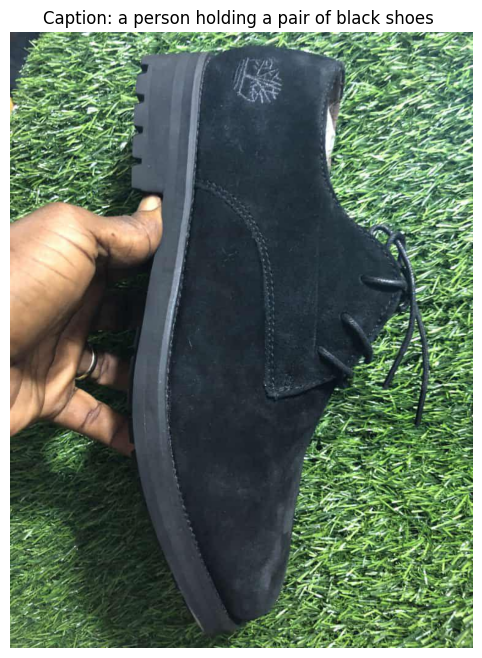


Generated caption: a person holding a pair of black shoes 

Choose input method:
1. Upload local image
2. Use image URL
3. Exit

Please upload an image file:


Saving IMG-20241119-WA0004.jpg to IMG-20241119-WA0004.jpg


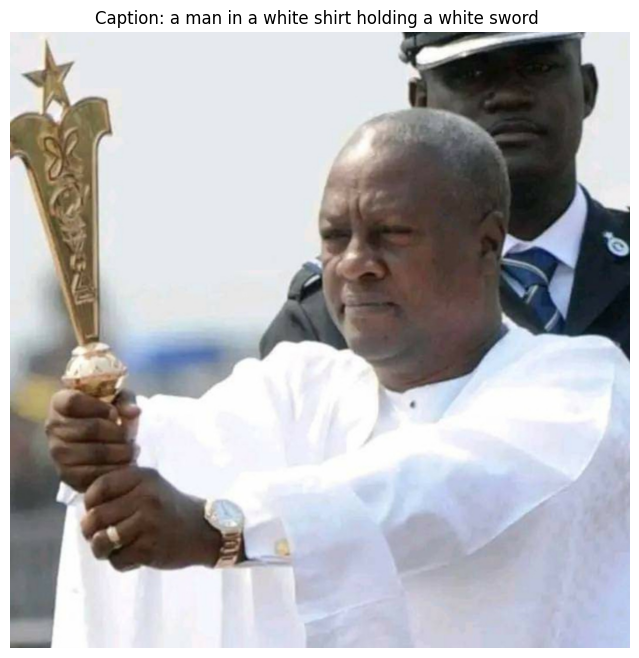


Generated caption: a man in a white shirt holding a white sword 

Choose input method:
1. Upload local image
2. Use image URL
3. Exit


In [ ]:
# Install required packages
!pip install transformers
!pip install torch torchvision
!pip install pillow

import torch
from PIL import Image
import requests
from io import BytesIO
from IPython.display import Image as DisplayImage
from IPython.display import display
import matplotlib.pyplot as plt
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
from google.colab import files
import numpy as np
import re

class ImageCaptioner:
    def __init__(self):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print(f"Using device: {self.device}")

        # Load models
        print("Loading models...")
        self.model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
        self.feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
        self.tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

        # Move model to device
        self.model.to(self.device)
        print("Models loaded successfully!")

    def is_valid_image_url(self, url):
        """Check if URL is a valid image URL"""
        image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.webp']
        return any(url.lower().endswith(ext) for ext in image_extensions)

    def load_image_from_url(self, url):
        """Load image from URL with better error handling"""
        try:
            if not self.is_valid_image_url(url):
                raise ValueError(
                    "Invalid image URL. Please provide a direct link to an image file "
                    "that ends with .jpg, .jpeg, .png, .gif, .bmp, or .webp"
                )

            response = requests.get(url)
            if response.status_code != 200:
                raise ValueError(f"Failed to fetch image. Status code: {response.status_code}")

            image = Image.open(BytesIO(response.content))
            return image
        except requests.exceptions.RequestException as e:
            raise ValueError(f"Error fetching image: {str(e)}")
        except Exception as e:
            raise ValueError(f"Error processing image: {str(e)}")

    def load_image_from_upload(self):
        """Load image from local upload with error handling"""
        try:
            uploaded = files.upload()
            if not uploaded:
                raise ValueError("No file was uploaded")

            image_path = next(iter(uploaded))
            image = Image.open(image_path)
            return image
        except Exception as e:
            raise ValueError(f"Error processing uploaded image: {str(e)}")

    def predict_step(self, image):
        """Generate caption for an image"""
        try:
            # Preprocess image
            pixel_values = self.feature_extractor(images=image, return_tensors="pt").pixel_values
            pixel_values = pixel_values.to(self.device)

            # Generate caption
            output_ids = self.model.generate(
                pixel_values,
                max_length=50,
                num_beams=4,
                early_stopping=True
            )[0]

            # Decode caption
            caption = self.tokenizer.decode(output_ids, skip_special_tokens=True)
            return caption
        except Exception as e:
            raise ValueError(f"Error generating caption: {str(e)}")

    def display_results(self, image, caption):
        """Display image and its caption"""
        plt.figure(figsize=(12, 8))
        plt.imshow(np.array(image))
        plt.axis('off')
        plt.title(f"Caption: {caption}")
        plt.show()

def main():
    # Initialize captioner
    captioner = ImageCaptioner()

    while True:
        print("\nChoose input method:")
        print("1. Upload local image")
        print("2. Use image URL")
        print("3. Exit")

        choice = input("Enter your choice (1, 2, or 3): ")

        if choice == "3":
            break

        try:
            if choice == "1":
                print("\nPlease upload an image file:")
                image = captioner.load_image_from_upload()
            elif choice == "2":
                url = input("\nEnter direct image URL (must end with .jpg, .jpeg, .png, etc.): ")
                image = captioner.load_image_from_url(url)
            else:
                print("Invalid choice! Please select 1, 2, or 3.")
                continue

            # Generate and display caption
            caption = captioner.predict_step(image)
            captioner.display_results(image, caption)
            print(f"\nGenerated caption: {caption}")

        except ValueError as e:
            print(f"\nError: {str(e)}")
        except Exception as e:
            print(f"\nAn unexpected error occurred: {str(e)}")

if __name__ == "__main__":
    main()